In [1]:
!pip install PyPR

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install matplotlib

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install scikit-image

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install sklearn

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install pandas

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from __future__ import print_function

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [8]:
def centroid_histogram(clt):    
# grab the number of different clusters and create a histogram
# based on the number of pixels assigned to each cluster    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels) 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum() 
    # return the histogram
    return hist

In [9]:
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
# of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
# loop over the percentage of each cluster and the color of
# each cluster
    for (percent, color) in zip(hist, centroids):
# plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX
# return the bar chart
    return bar

In [10]:
## K-means clustering of Pathology Images

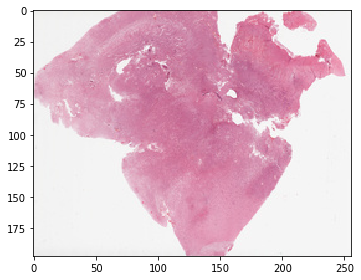

In [11]:
image = io.imread('/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg')
io.imshow(image)
io.show()

In [12]:
image = io.imread('/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg')
rows=image.shape[0]
cols=image.shape[1]
image=image.reshape(image.shape[0]*image.shape[1],3)

In [13]:
# kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[206.9215    , 126.4686875 , 160.6900625 ],
       [243.51537553, 242.74183107, 243.00139976],
       [221.5616809 , 162.08877991, 186.91138919]])

In [15]:
numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)

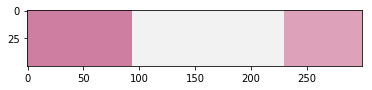

In [16]:
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)
 
# show our color bart
plt.figure()
plt.imshow(bar)
plt.show()

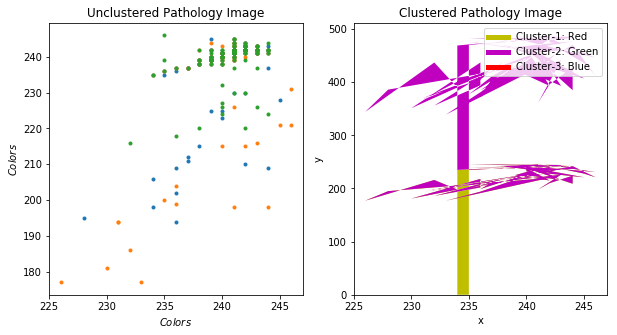

In [27]:
#http://pypr.sourceforge.net/kmeans.html#k-means-example
#https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py
import matplotlib.pyplot as plt 
from pypr.clustering.kmeans import *

figure(figsize=(10,5))
subplot(121)
title('Unclustered Pathology Image')
plt.plot(image[:,0], image[:,1], '.')
xlabel('$Colors$'); ylabel('$Colors$')

subplot(122)
title('Clustered Pathology Image')
#m, cc = kmeans(image, 3, iter=200, cluster_init='sample')
plt.plot([],[],color='y', label='Cluster-1: Red', linewidth=5)
plt.plot([],[],color='m', label='Cluster-2: Green', linewidth=5)
plt.plot([],[],color='r', label='Cluster-3: Blue', linewidth=5)

cluster1=image[:,0].flatten()
cluster2=image[:,1].flatten()
cluster3=image[:,2].flatten()

plt.stackplot(cluster1,cluster2, cluster3, colors=['y','m','r'])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [28]:
image[:,0].shape

(198, 3)

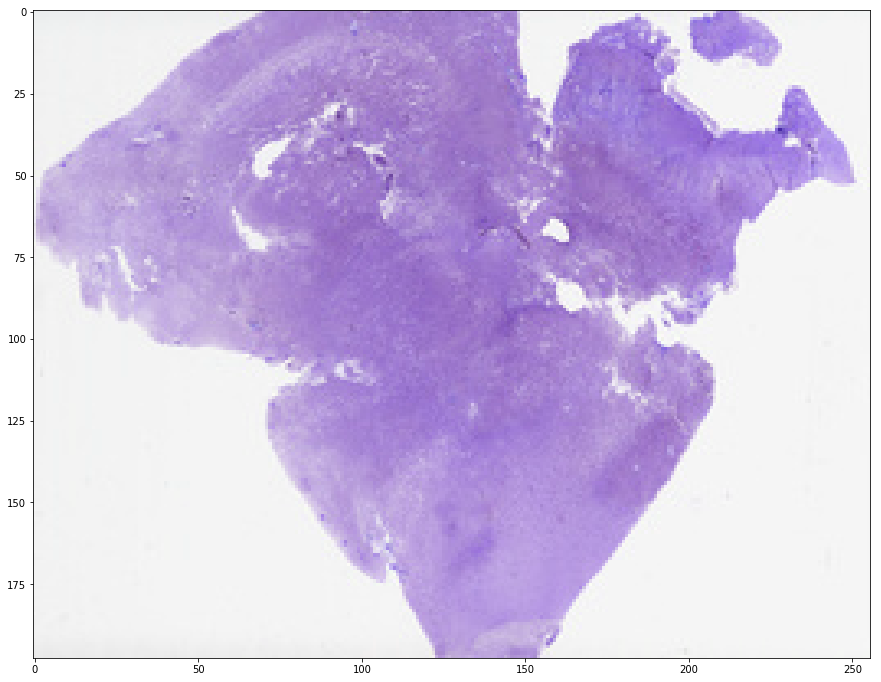

In [30]:
plt.imshow(image)

In [17]:
# Color histogram of image-Distribution of colors in an image
# RGB values 0-255
# x-axis : 256 bins for RGB range 
# Y-axis : number of pixels in the RGB color space bin

In [32]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import cv2

# load the image and show it
image = cv2.imread("/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg")
#cv2.imshow("image", image)

(0, 256)

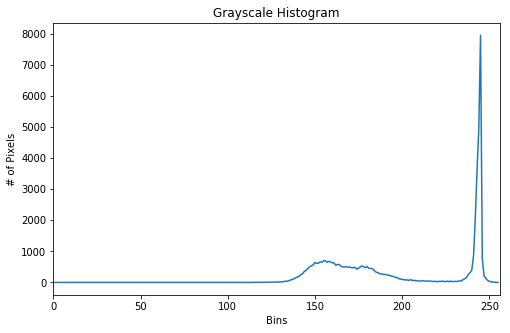

In [33]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("gray", gray)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

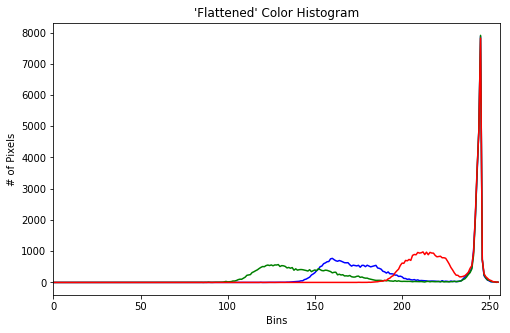

In [34]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.rcParams['figure.figsize'] = [8,5]
fig = plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/histogram.cpp:153: error: (-215:Assertion failed) j < nimages in function 'histPrepareImages'


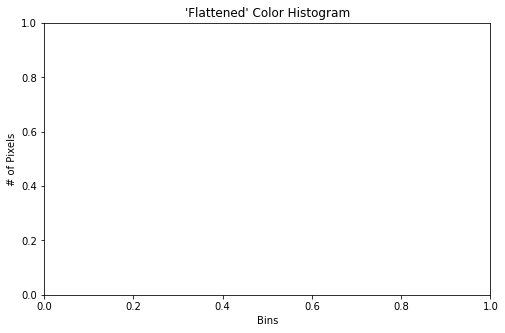

In [35]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.rcParams['figure.figsize'] = [8,5]
fig = plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [1], None, [256], [0, 256])
    features.extend(hist)
 
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

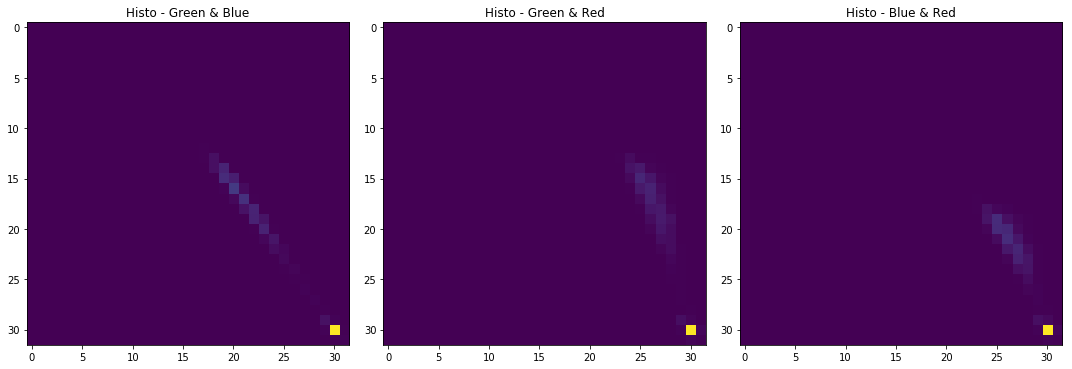

In [21]:
# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Histo - Green & Blue")
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Histo - Green & Red")

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Histo - Blue & Red")

plt.tight_layout()